# PIK3CA: Effects of Mutation on PTEN

<b> Standard imports for playing with and plotting data frames. </b>

In [6]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b> Import CPTAC data

In [7]:
import CPTAC

In [8]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and PTEN proteome abundance

### Perform a t-test with mutated and non-mutated protein levels

In [9]:
protList = ['PTEN']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for PTEN: 
Ttest_indResult(statistic=-4.26068842042751, pvalue=3.705563596591572e-05)


 ### We can now plot the data 

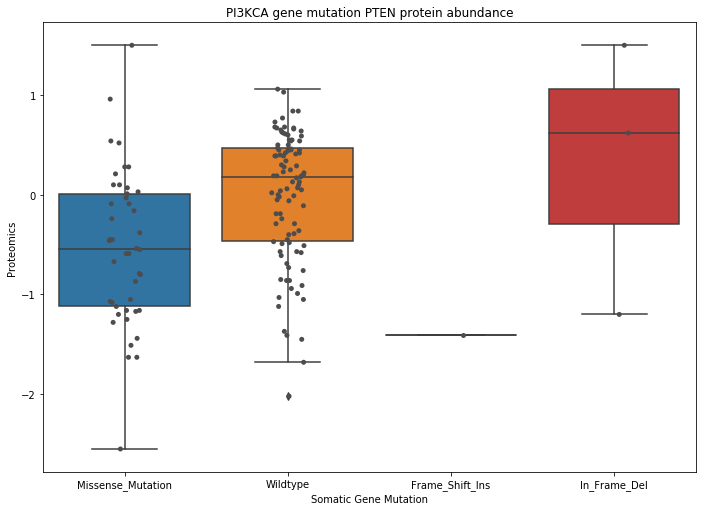

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='PTEN', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation PTEN protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='PTEN',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PIK3CA mutation and PTEN phosphoprote abundance 

In [13]:
phosProtList = ['PTEN']

In [15]:
sigResults = [];
pcutoff = 0.05/len(phosProtList)
print(pcutoff)
pcutoff = 1

for protein in phosProtList: 
        cross = CPTAC.compare_mutations(phos, protein, gene)
        #print(cross.head())
        for loc in cross.columns:
            #print(loc)
            cross_site = cross[["Mutation", loc]].dropna(axis=0)
            #print(cross_site)
            mutated = cross_site.loc[cross_site["Mutation"] == "Missense_Mutation"]
            wt = cross_site.loc[cross_site["Mutation"] == "Wildtype"]
            ttest = scipy.stats.ttest_ind(mutated[loc], wt[loc])
            if(ttest[1] <= pcutoff):
                sigResults.append(loc)
                print("Test for " + loc + ": ")
                print(ttest)   

0.05
Test for PTEN-S467: 
Ttest_indResult(statistic=-1.1136520082484684, pvalue=0.2675825687111729)
Test for PTEN-S558: 
Ttest_indResult(statistic=-0.5804050785497435, pvalue=0.5628733208877409)
Test for PTEN-T556: 
Ttest_indResult(statistic=-1.4035994623456274, pvalue=0.16363147974462247)


/Users/emilyhosk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ValueError: Cannot index with multidimensional key